# Juntando los datasets

In [3]:
import os
import pandas as pd

# Directorio donde se encuentran los CSV
folder_path = '/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/X-NLP/DataSets'

# Lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Cargar cada CSV en un DataFrame y añadirlo a la lista
        df = pd.read_csv(os.path.join(folder_path, filename))
        df_list.append(df)

# Concatenar todos los DataFrames de la lista en uno solo
combined_df = pd.concat(df_list, ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
combined_df.to_csv('tweets_globales.csv', index=False)

print('CSV combinados y guardados como archivo_combinado.csv')


CSV combinados y guardados como archivo_combinado.csv


# Limpiando Dataset

In [8]:
import spacy
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Cargar modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Función para eliminar los símbolos, emoticones y links
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F700-\U0001F77F"  
        u"\U0001F780-\U0001F7FF"  
        u"\U0001F800-\U0001F8FF"  
        u"\U0001F900-\U0001F9FF"  
        u"\U0001FA00-\U0001FA6F"  
        u"\U0001FA70-\U0001FAFF"  
        u"\U00002700-\U000027BF"  
        u"\U0001F1E0-\U0001F1FF"  
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Cargar la base de datos
tweets_file = "/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales.csv"
df_tweets = pd.read_csv(tweets_file)

# Eliminar tweets que no tienen texto
df_tweets_clean = df_tweets.dropna(subset=['Texto'])

# Aplicar la función de limpieza a la columna de texto 
df_tweets_clean['Texto'] = df_tweets_clean['Texto'].apply(clean_text)

# Guardar el resultado filtrado
df_tweets_clean.to_csv('/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales_limpios.csv', index=False)


/var/folders/8b/d34q145x44x2xf_06_gchyfw0000gq/T/ipykernel_34170/725563621.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_clean['Texto'] = df_tweets_clean['Texto'].apply(clean_text)


# Contador de palabras

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


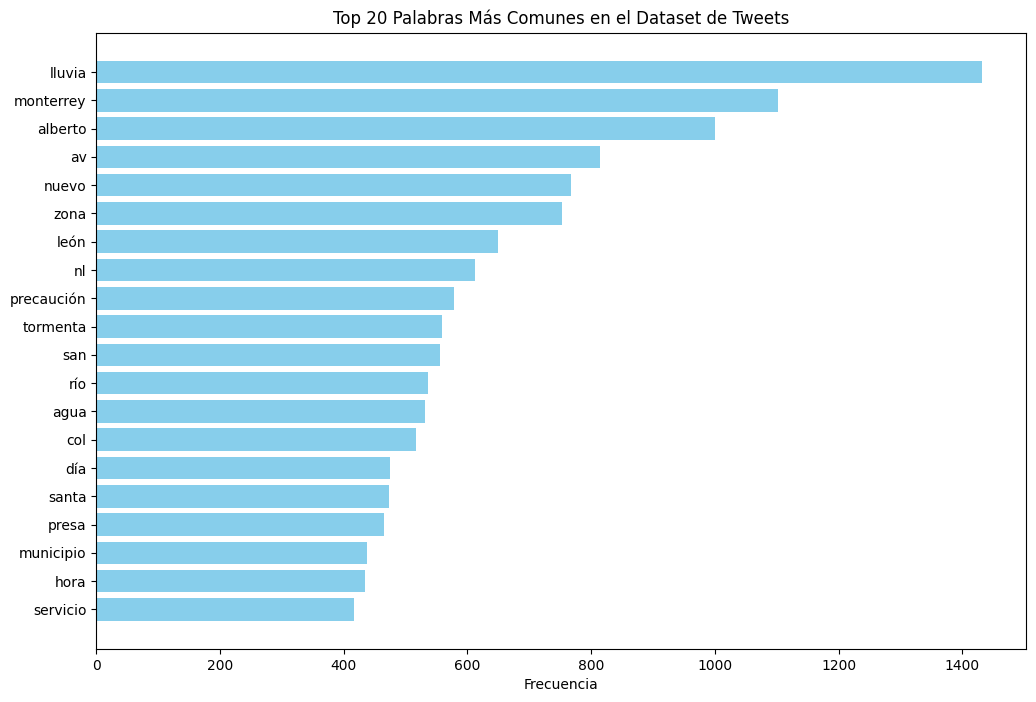

In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import spacy
import matplotlib.pyplot as plt

# Descargar stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Cargar el modelo de spaCy para español
nlp = spacy.load('es_core_news_sm')
nlp.max_length = 1500000  # Ajusta este valor según la longitud de tu texto

# Cargar el dataset
df = pd.read_csv('tweets_globales_limpios.csv')

# Función para preprocesar el texto
def preprocess_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    return text

# Función para lematizar y eliminar stopwords
def lemmatize_and_remove_stopwords(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    return lemmatized_words

# Concatenar todos los textos en una sola cadena
all_texts = ' '.join(df['Texto'].astype(str))

# Preprocesar el texto
processed_text = preprocess_text(all_texts)

# Lematizar y eliminar stopwords
lemmatized_words = lemmatize_and_remove_stopwords(processed_text)

# Contar las raíces de las palabras
word_counts = Counter(lemmatized_words)

# Mostrar las palabras más comunes
most_common_words = word_counts.most_common(20)  # Muestra las 50 palabras más comunes

# Preparar datos para la gráfica
words, counts = zip(*most_common_words)

# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('Top 20 Palabras Más Comunes en el Dataset de Tweets')
plt.gca().invert_yaxis()  # Para que la palabra más frecuente esté en la parte superior
plt.show()


In [13]:
df_tweets_clean.describe()

,Likes,Retweets,Comentarios,Citas
count,8314.000000,8314.000000,8314.000000,8314.000000
mean,340.581549,74.450565,12.966442,4.640967
std,2197.113344,614.583957,103.754157,52.739604
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,11.000000,3.000000,1.000000,0.000000
75%,55.000000,12.000000,3.000000,1.000000
max,99745.000000,20832.000000,4117.000000,3455.000000


In [14]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8314 entries, 0 to 8388
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Usuario      8314 non-null   object
 1   Nombre       8314 non-null   object
 2   Fecha        8314 non-null   object
 3   Texto        8314 non-null   object
 4   Likes        8314 non-null   int64 
 5   Retweets     8314 non-null   int64 
 6   Comentarios  8314 non-null   int64 
 7   Citas        8314 non-null   int64 
 8   Enlace       8314 non-null   object
 9   Imágenes     3593 non-null   object
 10  Videos       1656 non-null   object
 11  GIFs         41 non-null     object
dtypes: int64(4), object(8)
memory usage: 844.4+ KB


# Filrando por palabras claves

In [15]:
# Función para verificar si el tweet contiene una palabra clave o sus variantes
def contains_keyword(text, keywords, nlp):
    doc = nlp(text)
    lemmas = {token.lemma_ for token in doc}
    return any(keyword in lemmas for keyword in keywords)



#FILTRADO POR PALABRAS CLAVES
keywords = ['lluvia', 'inundación', 'accidente', 'apagón', 'deslave', 'desborde', 'incendio', 'fuga', 'colapso', 'tormenta', 'agua', 'precaución']



df_tweets_filtered = df_tweets_clean[df_tweets_clean['Texto'].apply(lambda x: contains_keyword(x, keywords, nlp))]
# Guardar el resultado filtrado
df_tweets_filtered.to_csv('/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales_filtrados.csv', index=False)


In [16]:
df_tweets_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2794 entries, 30 to 8386
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Usuario      2794 non-null   object
 1   Nombre       2794 non-null   object
 2   Fecha        2794 non-null   object
 3   Texto        2794 non-null   object
 4   Likes        2794 non-null   int64 
 5   Retweets     2794 non-null   int64 
 6   Comentarios  2794 non-null   int64 
 7   Citas        2794 non-null   int64 
 8   Enlace       2794 non-null   object
 9   Imágenes     1202 non-null   object
 10  Videos       760 non-null    object
 11  GIFs         16 non-null     object
dtypes: int64(4), object(8)
memory usage: 283.8+ KB


# Entrenamiento del modelo con los tweets pre-clasificados

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch


# Cargar el dataset
df = pd.read_csv("tweets_better_classified.csv")

# Preprocesar las etiquetas
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])  # Ajusta 'categoria' a la columna correspondiente

# Dividir el dataset en entrenamiento y prueba
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Inicializar el tokenizer BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Función para tokenizar los textos
def tokenize_function(examples):
    return tokenizer(examples['Texto'], padding="max_length", truncation=True, max_length=128)

# Aplicar el tokenizer a los datos de entrenamiento y prueba
train_encodings = tokenizer(list(train['Texto'].values), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test['Texto'].values), truncation=True, padding=True, max_length=128)

# Convertir las etiquetas en tensores
train_labels = torch.tensor(train['label'].values)
test_labels = torch.tensor(test['label'].values)

# Crear un dataset personalizado
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

# Cargar el modelo BERT para clasificación de secuencias
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=4)  

# Definir los argumentos del entrenamiento
training_args = TrainingArguments(
    output_dir='./results',          # Directorio para guardar los resultados
    num_train_epochs=10,              # Número de épocas
    per_device_train_batch_size=16,  # Tamaño del lote en entrenamiento
    per_device_eval_batch_size=64,   # Tamaño del lote en evaluación
    warmup_steps=500,                # Número de pasos para warmup
    weight_decay=0.01,               # Tasa de decaimiento del peso
    logging_dir='./logs',            # Directorio para guardar los logs
    logging_steps=10,
)

# Crear el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Entrenar el modelo
trainer.train()

# Evaluar el modelo
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# Reporte de clasificación
print(classification_report(test_labels, preds, target_names=label_encoder.classes_))


In [ ]:
model.save_pretrained('./my_model')
tokenizer.save_pretrained('./my_model')

# Clasificando tweets con BERT pre-entrenado

In [7]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch


In [11]:

# Cargar el tokenizador y el modelo
tokenizer = BertTokenizer.from_pretrained('./my_model')
model = BertForSequenceClassification.from_pretrained('./my_model')

# Cargar el LabelEncoder (Asegúrate de que es el mismo usado durante el entrenamiento)
df_original = pd.read_csv("tweets_better_classified.csv")  # Dataset original para recuperar las etiquetas
label_encoder = LabelEncoder()
label_encoder.fit(df_original['Tipo'])  # Ajusta 'Tipo' a la columna de etiquetas original

# Cargar el dataset filtrado
df_filtered = pd.read_csv("tweets_globales_filtrados.csv")

# Define una función para predecir nuevos textos
def predict_new_text(text):
    # Tokenizar el texto
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Asegúrate de mover el modelo y los inputs a la GPU si está disponible
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Hacer la predicción
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Obtener la clase predicha
    predicted_class = torch.argmax(logits, dim=1).item()

    # Decodificar la etiqueta predicha
    predicted_label = label_encoder.inverse_transform([predicted_class])

    return predicted_label[0]

# Predecir etiquetas para la columna 'texto' y almacenarlas en una nueva columna 'Tipo'
df_filtered['Tipo'] = df_filtered['Texto'].apply(predict_new_text)

# Guardar el nuevo DataFrame en un archivo CSV
df_filtered.to_csv("tweets_globales_clasificados.csv", index=False)

print("Archivo 'tweets_classified.csv' guardado con las etiquetas predichas.")


Archivo 'tweets_classified.csv' guardado con las etiquetas predichas.


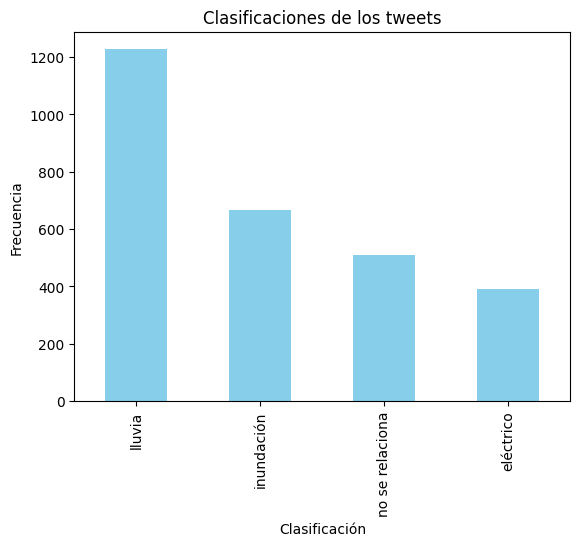

In [13]:
import matplotlib.pyplot as plt
tweets_clean_classified = "tweets_globales_clasificados.csv"
df_tweets_clean_fil = pd.read_csv(tweets_clean_classified)

tipo_counts = df_tweets_clean_fil['Tipo'].value_counts()

# Creación del histograma
tipo_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.title('Clasificaciones de los tweets')
plt.show()

# Tweets multiclasificados

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
import accelerate



C:\Users\a00832699\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
df = pd.read_csv("df_tweets_procesados.csv")

In [18]:
# Preprocess labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])

# Print unique labels and their count
print("Unique labels in the dataset:", df['label'].unique())
print("Number of unique labels:", len(df['label'].unique()))

# Split the dataset into training and testing
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the texts
train_encodings = tokenizer(list(train['Texto'].values), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test['Texto'].values), truncation=True, padding=True, max_length=128)

# Convert labels to tensors
train_labels = torch.tensor(train['label'].values)
test_labels = torch.tensor(test['label'].values)

class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):  # Change _init_ to __init__
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):  # Change _getitem_ to __getitem__
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):  # Change _len_ to __len__
        return len(self.labels)


train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

# Check the number of unique labels
num_labels = len(label_encoder.classes_)
print("Number of labels for model:", num_labels)

# Load BERT for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',              # Directorio donde se guardarán los resultados
    num_train_epochs=2,                  # Número de épocas de entrenamiento (ajustable según el rendimiento)
    per_device_train_batch_size=16,      # Tamaño del batch para entrenamiento
    per_device_eval_batch_size=32,       # Tamaño del batch para evaluación
    warmup_steps=100,                     # Pasos de calentamiento para la tasa de aprendizaje
    weight_decay=0.05,                   # Decaimiento de peso para evitar sobreajuste
    logging_dir='./logs',                 # Directorio para guardar los logs
    logging_steps=20,                     # Frecuencia para registrar el progreso
    evaluation_strategy="steps",          # Evaluar en cada número de pasos
    eval_steps=100,                       # Número de pasos entre evaluaciones
    save_total_limit=2,                   # Mantener solo los dos últimos modelos guardados
    load_best_model_at_end=True,         # Cargar el mejor modelo al final del entrenamiento
    metric_for_best_model="accuracy",     # Métrica para determinar el mejor modelo
)

# Create the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# Classification report
print(classification_report(test_labels.numpy(), preds, target_names=label_encoder.classes_))

# Save the model and tokenizer
model.save_pretrained('./my_model4')
tokenizer.save_pretrained('./my_model4')

Unique labels in the dataset: [4 3 2 0 5 1]
Number of unique labels: 6
Number of labels for model: 6


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\a00832699\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
 11%|█         | 20/188 [00:34<04:50,  1.73s/it]

{'loss': 1.7947, 'grad_norm': 8.680418968200684, 'learning_rate': 1e-05, 'epoch': 0.21}


 21%|██▏       | 40/188 [01:09<04:16,  1.74s/it]

{'loss': 1.4601, 'grad_norm': 5.0799641609191895, 'learning_rate': 2e-05, 'epoch': 0.43}


 32%|███▏      | 60/188 [01:44<03:50,  1.80s/it]

{'loss': 1.0718, 'grad_norm': 6.140811443328857, 'learning_rate': 3e-05, 'epoch': 0.64}


 43%|████▎     | 80/188 [02:21<03:15,  1.81s/it]

{'loss': 0.9185, 'grad_norm': 6.9848833084106445, 'learning_rate': 4e-05, 'epoch': 0.85}


 53%|█████▎    | 100/188 [02:56<02:35,  1.77s/it]

{'loss': 0.6228, 'grad_norm': 6.4171671867370605, 'learning_rate': 5e-05, 'epoch': 1.06}


                                                 
 53%|█████▎    | 100/188 [03:05<02:35,  1.77s/it]

{'eval_loss': 0.49569809436798096, 'eval_runtime': 8.6462, 'eval_samples_per_second': 43.256, 'eval_steps_per_second': 1.388, 'epoch': 1.06}


 64%|██████▍   | 120/188 [03:41<02:02,  1.80s/it]

{'loss': 0.4197, 'grad_norm': 3.9916014671325684, 'learning_rate': 3.8636363636363636e-05, 'epoch': 1.28}


 74%|███████▍  | 140/188 [04:17<01:27,  1.81s/it]

{'loss': 0.4317, 'grad_norm': 5.42241907119751, 'learning_rate': 2.7272727272727273e-05, 'epoch': 1.49}


 85%|████████▌ | 160/188 [04:53<00:50,  1.81s/it]

{'loss': 0.2951, 'grad_norm': 3.3735485076904297, 'learning_rate': 1.590909090909091e-05, 'epoch': 1.7}


 96%|█████████▌| 180/188 [05:29<00:14,  1.83s/it]

{'loss': 0.2277, 'grad_norm': 8.668563842773438, 'learning_rate': 4.5454545454545455e-06, 'epoch': 1.91}


100%|██████████| 188/188 [05:44<00:00,  1.83s/it]


{'train_runtime': 344.168, 'train_samples_per_second': 8.682, 'train_steps_per_second': 0.546, 'train_loss': 0.7808315734914009, 'epoch': 2.0}


100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
C:\Users\a00832699\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\a00832699\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\a00832699\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

                 precision    recall  f1-score   support

      eléctrico       0.00      0.00      0.00         3
       incendio       0.94      1.00      0.97        30
     inundación       0.83      0.94      0.88        16
         lluvia       0.99      0.98      0.98       219
no se relaciona       0.99      0.97      0.98        69
  problema vial       0.95      0.97      0.96        37

       accuracy                           0.97       374
      macro avg       0.78      0.81      0.80       374
   weighted avg       0.96      0.97      0.97       374



('./my_model4\\tokenizer_config.json',
 './my_model4\\special_tokens_map.json',
 './my_model4\\vocab.txt',
 './my_model4\\added_tokens.json')

In [21]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from scipy.special import softmax

# Cargar el modelo y el tokenizer pre-entrenado
model = BertForSequenceClassification.from_pretrained('./my_model4')
tokenizer = BertTokenizer.from_pretrained('./my_model4')

# Definir un texto de ejemplo
texto_ejemplo = "Fuertes inundaciones accidente a en la avenida garza sada  en Monterrey"

# Tokenizar el texto
inputs = tokenizer(texto_ejemplo, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Asegurarse de que el modelo está en modo de evaluación
model.eval()

# Hacer la predicción (no se necesita calcular los gradientes)
with torch.no_grad():
    outputs = model(**inputs)

# Obtener las logits y calcular las probabilidades con softmax
logits = outputs.logits
probabilidades = softmax(logits.numpy(), axis=1)[0]

# Cargar el LabelEncoder para obtener las categorías
df = pd.read_csv("df_tweets_procesados.csv")
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])

# Obtener los nombres de las categorías
categorias = label_encoder.classes_

# Crear un nuevo DataFrame con las categorías y las probabilidades
df_resultado = pd.DataFrame([probabilidades], columns=categorias)

# Agregar el texto de ejemplo para referencia
df_resultado['Texto'] = texto_ejemplo

# Mostrar el DataFrame con las categorías y sus porcentajes de presencia
print(df_resultado)

   eléctrico  incendio  inundación    lluvia  no se relaciona  problema vial  \
0   0.020568  0.022571    0.033255  0.009869          0.01463       0.899107   

                                               Texto  
0  Fuertes inundaciones accidente a en la avenida...  


# Segunda arquitectura

In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report


# Cargando el dataset
df = pd.read_csv("df_tweets_procesados.csv")

# Preprocesar etiquetas
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])  

# Ver etiquetas únicas
print("Unique labels in the dataset:", df['label'].unique())
print("Number of unique labels:", len(df['label'].unique()))

# Dividir el dataset en entrenamiento y prueba
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Inicializar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenizar los textos
train_encodings = tokenizer(list(train['Texto'].values), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test['Texto'].values), truncation=True, padding=True, max_length=128)

# Convertir las etiquetas a tensores
train_labels = torch.tensor(train['label'].values)
test_labels = torch.tensor(test['label'].values)

# Crear dataset personalizado para el entrenamiento
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

# Número de etiquetas (clases) para la clasificación
num_labels = len(label_encoder.classes_)
print("Number of labels for model:", num_labels)

# Cargar el modelo preentrenado de BERT para clasificación de secuencias
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Definir los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',              # Directorio donde se guardarán los resultados
    num_train_epochs=3,                  # Número de épocas de entrenamiento (puedes aumentar si el rendimiento es bajo)
    per_device_train_batch_size=16,      # Tamaño del batch para entrenamiento
    per_device_eval_batch_size=32,       # Tamaño del batch para evaluación
    warmup_steps=100,                    # Pasos de calentamiento para la tasa de aprendizaje
    weight_decay=0.01,                   # Decaimiento de peso para evitar sobreajuste (ajustable)
    logging_dir='./logs',                # Directorio para guardar los logs
    logging_steps=50,                    # Frecuencia para registrar el progreso
    evaluation_strategy="steps",         # Evaluar en cada número de pasos
    eval_steps=100,                      # Número de pasos entre evaluaciones
    save_total_limit=2,                  # Mantener solo los dos últimos modelos guardados
    load_best_model_at_end=True,         # Cargar el mejor modelo al final del entrenamiento
    metric_for_best_model="accuracy",    # Métrica para determinar el mejor modelo
    greater_is_better=True,              # Mayor es mejor para la métrica (accuracy)
    learning_rate=2e-5                   # Tasa de aprendizaje (puedes ajustar este valor según el rendimiento)
)

# Crear el Trainer para el modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Entrenar el modelo
trainer.train()

# Evaluar el modelo
predictions = trainer.predict(test_dataset)
pred_probs = torch.softmax(torch.tensor(predictions.predictions), dim=1)  # Aplicar softmax para obtener probabilidades
preds = torch.argmax(pred_probs, dim=1).numpy()

# Imprimir reporte de clasificación
print(classification_report(test_labels.numpy(), preds, target_names=label_encoder.classes_))

# Guardar el modelo y el tokenizer
model.save_pretrained('./my_model7')
tokenizer.save_pretrained('./my_model7')


C:\Users\a00832699\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Unique labels in the dataset: [4 3 2 0 5 1]
Number of unique labels: 6
Number of labels for model: 6


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\a00832699\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
  5%|▌         | 50/940 [01:28<26:02,  1.76s/it]

{'loss': 1.4984, 'grad_norm': 4.432082176208496, 'learning_rate': 1e-05, 'epoch': 0.53}


 11%|█         | 100/940 [04:40<56:22,  4.03s/it] 

{'loss': 1.0554, 'grad_norm': 6.978498458862305, 'learning_rate': 2e-05, 'epoch': 1.06}


                                                 
 11%|█         | 100/940 [05:00<56:22,  4.03s/it]

{'eval_loss': 0.7562560439109802, 'eval_runtime': 20.7154, 'eval_samples_per_second': 18.054, 'eval_steps_per_second': 0.579, 'epoch': 1.06}


 16%|█▌        | 150/940 [08:33<57:07,  4.34s/it]  

{'loss': 0.6009, 'grad_norm': 6.253035068511963, 'learning_rate': 1.880952380952381e-05, 'epoch': 1.6}


 21%|██▏       | 200/940 [11:50<50:21,  4.08s/it]

{'loss': 0.288, 'grad_norm': 1.8549944162368774, 'learning_rate': 1.761904761904762e-05, 'epoch': 2.13}


                                                 
 21%|██▏       | 200/940 [12:11<50:21,  4.08s/it]

{'eval_loss': 0.16738632321357727, 'eval_runtime': 21.3474, 'eval_samples_per_second': 17.52, 'eval_steps_per_second': 0.562, 'epoch': 2.13}


 27%|██▋       | 250/940 [14:13<19:57,  1.74s/it]  

{'loss': 0.178, 'grad_norm': 0.4753738343715668, 'learning_rate': 1.642857142857143e-05, 'epoch': 2.66}


 32%|███▏      | 300/940 [15:39<18:32,  1.74s/it]

{'loss': 0.099, 'grad_norm': 0.2483217418193817, 'learning_rate': 1.523809523809524e-05, 'epoch': 3.19}


                                                 
 32%|███▏      | 300/940 [15:47<18:32,  1.74s/it]

{'eval_loss': 0.08934140205383301, 'eval_runtime': 8.1116, 'eval_samples_per_second': 46.107, 'eval_steps_per_second': 1.479, 'epoch': 3.19}


 37%|███▋      | 350/940 [17:14<17:12,  1.75s/it]

{'loss': 0.1272, 'grad_norm': 0.5055071115493774, 'learning_rate': 1.4047619047619048e-05, 'epoch': 3.72}


 43%|████▎     | 400/940 [18:42<16:13,  1.80s/it]

{'loss': 0.1251, 'grad_norm': 0.2707533538341522, 'learning_rate': 1.2857142857142859e-05, 'epoch': 4.26}


                                                 
 43%|████▎     | 400/940 [18:50<16:13,  1.80s/it]

{'eval_loss': 0.05892825126647949, 'eval_runtime': 8.3607, 'eval_samples_per_second': 44.733, 'eval_steps_per_second': 1.435, 'epoch': 4.26}


 48%|████▊     | 450/940 [20:19<14:28,  1.77s/it]

{'loss': 0.0709, 'grad_norm': 0.15023232996463776, 'learning_rate': 1.1666666666666668e-05, 'epoch': 4.79}


 53%|█████▎    | 500/940 [21:47<13:08,  1.79s/it]

{'loss': 0.0711, 'grad_norm': 3.9858367443084717, 'learning_rate': 1.0476190476190477e-05, 'epoch': 5.32}


                                                 
 53%|█████▎    | 500/940 [21:55<13:08,  1.79s/it]

{'eval_loss': 0.0496138297021389, 'eval_runtime': 8.4527, 'eval_samples_per_second': 44.246, 'eval_steps_per_second': 1.42, 'epoch': 5.32}


KeyError: "The `metric_for_best_model` training argument is set to 'eval_accuracy', which is not found in the evaluation metrics. The available evaluation metrics are: ['eval_loss', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'epoch']. Consider changing the `metric_for_best_model` via the TrainingArguments."

In [26]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from scipy.special import softmax

# Cargar el modelo y el tokenizer pre-entrenado
model = BertForSequenceClassification.from_pretrained('./my_model5')
tokenizer = BertTokenizer.from_pretrained('./my_model5')

# Definir un texto de ejemplo
texto_ejemplo = "Incendio de un transformador dejan si luz a toda la comunidad de la colonia"

# Tokenizar el texto
inputs = tokenizer(texto_ejemplo, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Asegurarse de que el modelo está en modo de evaluación
model.eval()

# Hacer la predicción (no se necesita calcular los gradientes)
with torch.no_grad():
    outputs = model(**inputs)

# Obtener las logits y calcular las probabilidades con softmax
logits = outputs.logits
probabilidades = softmax(logits.numpy(), axis=1)[0]

# Cargar el LabelEncoder para obtener las categorías
df = pd.read_csv("df_tweets_procesados.csv")
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])

# Obtener los nombres de las categorías
categorias = label_encoder.classes_

# Crear un nuevo DataFrame con las categorías y las probabilidades
df_resultado = pd.DataFrame([probabilidades], columns=categorias)

# Agregar el texto de ejemplo para referencia
df_resultado['Texto'] = texto_ejemplo

# Mostrar el DataFrame con las categorías y sus porcentajes de presencia
print(df_resultado)

   eléctrico  incendio  inundación    lluvia  no se relaciona  problema vial  \
0   0.036221   0.77043    0.007951  0.028169         0.110785       0.046444   

                                               Texto  
0  Incendio de un transformador dejan si luz a to...  


In [30]:
import torch 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report
import evaluate

# Cargar el dataset
df = pd.read_csv("tweets_clasificados.csv")

# Preprocesar etiquetas
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])  

# Dividir el dataset en entrenamiento y prueba
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Inicializar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenizar los textos (Asegúrate de que son strings)
train_encodings = tokenizer(train['Texto'].astype(str).tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test['Texto'].astype(str).tolist(), truncation=True, padding=True, max_length=128)

# Convertir las etiquetas a tensores
train_labels = torch.tensor(train['label'].values)
test_labels = torch.tensor(test['label'].values)

# Crear dataset personalizado para el entrenamiento
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # Asegúrate de que esto sea un tensor
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

# Cargar el modelo preentrenado de BERT para clasificación de secuencias
num_labels = len(label_encoder.classes_)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Cargar la métrica de accuracy desde la nueva biblioteca evaluate
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": accuracy["accuracy"]}

# Definir los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=100,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",  
    greater_is_better=True,
    learning_rate=2e-5
)

# Crear el Trainer para el modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  
)

# Entrenar el modelo
trainer.train()

# Evaluar el modelo
predictions = trainer.predict(test_dataset)
pred_probs = torch.softmax(torch.tensor(predictions.predictions), dim=1)
preds = torch.argmax(pred_probs, dim=1).numpy()

# Imprimir reporte de clasificación
print(classification_report(test_labels.numpy(), preds, target_names=label_encoder.classes_))

# Guardar el modelo y el tokenizer
model.save_pretrained('./my_model6')
tokenizer.save_pretrained('./my_model6')


ValueError: Input is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

# este es el nuevo clasificador!!!

In [45]:
import torch 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report
import evaluate

# Cargar el dataset
df = pd.read_csv("nuevo_archivo.csv")

# Preprocesar etiquetas
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])  

# Dividir el dataset en entrenamiento y prueba
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Inicializar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenizar los textos (Asegúrate de que son strings)
train_encodings = tokenizer(train['Texto'].astype(str).tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test['Texto'].astype(str).tolist(), truncation=True, padding=True, max_length=128)

# Convertir las etiquetas a tensores
train_labels = torch.tensor(train['label'].values)
test_labels = torch.tensor(test['label'].values)

# Crear dataset personalizado para el entrenamiento
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx]) 
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

# Cargar el modelo preentrenado de BERT para clasificación de secuencias
num_labels = len(label_encoder.classes_)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Cargar la métrica de accuracy desde la nueva biblioteca evaluate
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": accuracy["accuracy"]}

# Definir los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=100,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",  
    greater_is_better=True,
    learning_rate=2e-5
)

# Crear el Trainer para el modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  
)

# Entrenar el modelo
trainer.train()

# Evaluar el modelo
predictions = trainer.predict(test_dataset)
pred_probs = torch.softmax(torch.tensor(predictions.predictions), dim=1)
preds = torch.argmax(pred_probs, dim=1).numpy()

# Imprimir reporte de clasificación
print(classification_report(test_labels.numpy(), preds, target_names=label_encoder.classes_))

# Guardar el modelo y el tokenizer
model.save_pretrained('./my_model6')
tokenizer.save_pretrained('./my_model6')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\a00832699\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
  0%|          | 0/426 [00:00<?, ?it/s]C:\Users\a00832699\AppData\Local\Temp\ipykernel_14216\941573390.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
                                                
 12%|█▏        | 50/426 [01:26<10:53,  1.74s/it] 

{'loss': 1.671, 'grad_norm': 5.880342483520508, 'learning_rate': 1e-05, 'epoch': 0.35}


                                                 
 23%|██▎       | 100/426 [02:55<09:46,  1.80s/it]  

{'loss': 1.3983, 'grad_norm': 5.004861831665039, 'learning_rate': 2e-05, 'epoch': 0.7}






















                                                 
                                                
 23%|██▎       | 100/426 [03:14<09:46,  1.80s/it]
C:\Users\a00832699\AppData\Local\Temp\ipykernel_14216\941573390.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


{'eval_loss': 1.1365094184875488, 'eval_accuracy': 0.6707964601769911, 'eval_runtime': 18.3804, 'eval_samples_per_second': 30.739, 'eval_steps_per_second': 0.979, 'epoch': 0.7}


                                                 
 35%|███▌      | 150/426 [04:42<08:29,  1.85s/it]  

{'loss': 0.9411, 'grad_norm': 4.041423797607422, 'learning_rate': 1.6932515337423315e-05, 'epoch': 1.06}


                                                 
 47%|████▋     | 200/426 [06:47<15:23,  4.09s/it]  

{'loss': 0.7253, 'grad_norm': 3.585031747817993, 'learning_rate': 1.3865030674846627e-05, 'epoch': 1.41}






















                                                 
                                                
 47%|████▋     | 200/426 [07:29<15:23,  4.09s/it]
C:\Users\a00832699\AppData\Local\Temp\ipykernel_14216\941573390.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


{'eval_loss': 0.5354270935058594, 'eval_accuracy': 0.8407079646017699, 'eval_runtime': 42.0585, 'eval_samples_per_second': 13.434, 'eval_steps_per_second': 0.428, 'epoch': 1.41}


                                                   
 59%|█████▊    | 250/426 [09:43<05:01,  1.71s/it]  

{'loss': 0.5355, 'grad_norm': 6.749011993408203, 'learning_rate': 1.079754601226994e-05, 'epoch': 1.76}


                                                 
 70%|███████   | 300/426 [11:09<03:43,  1.77s/it]  

{'loss': 0.413, 'grad_norm': 4.840836524963379, 'learning_rate': 7.730061349693252e-06, 'epoch': 2.11}






















                                                 
                                                
 70%|███████   | 300/426 [11:28<03:43,  1.77s/it]
C:\Users\a00832699\AppData\Local\Temp\ipykernel_14216\941573390.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


{'eval_loss': 0.3067410886287689, 'eval_accuracy': 0.9185840707964602, 'eval_runtime': 18.3101, 'eval_samples_per_second': 30.857, 'eval_steps_per_second': 0.983, 'epoch': 2.11}


                                                 
 82%|████████▏ | 350/426 [12:57<02:16,  1.79s/it]  

{'loss': 0.2877, 'grad_norm': 1.0295826196670532, 'learning_rate': 4.662576687116564e-06, 'epoch': 2.46}


                                                 
 94%|█████████▍| 400/426 [14:26<00:46,  1.79s/it]  

{'loss': 0.2689, 'grad_norm': 4.481869220733643, 'learning_rate': 1.5950920245398775e-06, 'epoch': 2.82}






















                                                 
                                                
 94%|█████████▍| 400/426 [14:45<00:46,  1.79s/it]
C:\Users\a00832699\AppData\Local\Temp\ipykernel_14216\941573390.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


{'eval_loss': 0.24593138694763184, 'eval_accuracy': 0.9309734513274336, 'eval_runtime': 18.4244, 'eval_samples_per_second': 30.666, 'eval_steps_per_second': 0.977, 'epoch': 2.82}


                                                 
100%|██████████| 426/426 [15:31<00:00,  2.19s/it]  
C:\Users\a00832699\AppData\Local\Temp\ipykernel_14216\941573390.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


{'train_runtime': 931.6598, 'train_samples_per_second': 7.277, 'train_steps_per_second': 0.457, 'train_loss': 0.7483531645206218, 'epoch': 3.0}


100%|██████████| 18/18 [00:17<00:00,  1.03it/s]


                 precision    recall  f1-score   support

      eléctrico       0.87      0.85      0.86        62
       incendio       0.94      0.94      0.94        47
     inundación       0.93      1.00      0.97        57
         lluvia       1.00      0.98      0.99       247
no se relaciona       0.80      0.80      0.80        79
  problema vial       0.92      0.95      0.93        73

       accuracy                           0.93       565
      macro avg       0.91      0.92      0.91       565
   weighted avg       0.93      0.93      0.93       565



('./my_model6\\tokenizer_config.json',
 './my_model6\\special_tokens_map.json',
 './my_model6\\vocab.txt',
 './my_model6\\added_tokens.json')

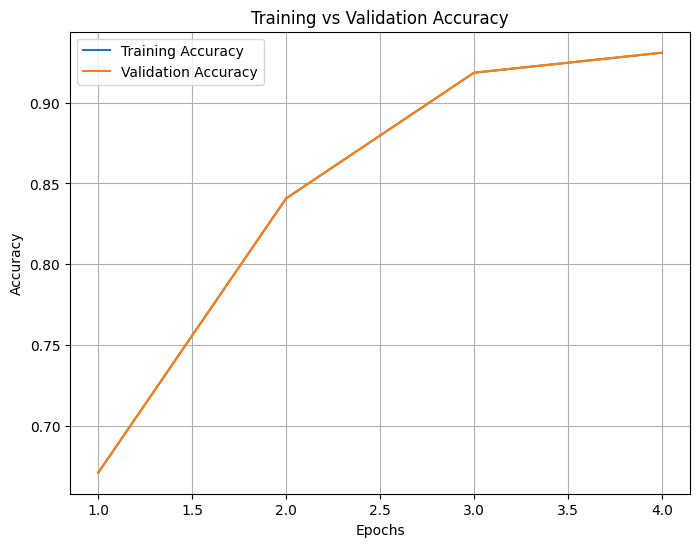

In [53]:
import matplotlib.pyplot as plt

# Recuperar los registros de entrenamiento y evaluación
training_logs = trainer.state.log_history

# Filtrar los valores de accuracy y epochs de los logs
train_accuracy = [log['eval_accuracy'] for log in training_logs if 'eval_accuracy' in log]
eval_accuracy = [log['eval_accuracy'] for log in training_logs if 'eval_accuracy' in log]
epochs = range(1, len(train_accuracy) + 1)

# Graficar accuracy de entrenamiento y validación
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, eval_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from scipy.special import softmax

# Cargar el modelo y el tokenizer pre-entrenado
model = BertForSequenceClassification.from_pretrained('./my_model6')
tokenizer = BertTokenizer.from_pretrained('./my_model6')

# Definir un texto de ejemplo
texto_ejemplo = "se cae un poste eléctrico y produce incedio"

# Tokenizar el texto
inputs = tokenizer(texto_ejemplo, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Asegurarse de que el modelo está en modo de evaluación
model.eval()

# Hacer la predicción (no se necesita calcular los gradientes)
with torch.no_grad():
    outputs = model(**inputs)

# Obtener las logits y calcular las probabilidades con softmax
logits = outputs.logits
probabilidades = softmax(logits.numpy(), axis=1)[0]

# Cargar el LabelEncoder para obtener las categorías
df = pd.read_csv("df_tweets_procesados.csv")
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])

# Obtener los nombres de las categorías
categorias = label_encoder.classes_

# Crear un nuevo DataFrame con las categorías y las probabilidades
df_resultado = pd.DataFrame([probabilidades], columns=categorias)

# Agregar el texto de ejemplo para referencia
df_resultado['Texto'] = texto_ejemplo

# Mostrar el DataFrame con las categorías y sus porcentajes de presencia
print(df_resultado)

   eléctrico  incendio  inundación    lluvia  no se relaciona  problema vial  \
0   0.848592  0.024073    0.019839  0.017543         0.060011       0.029943   

                                         Texto  
0  se cae un poste eléctrico y produce incedio  
